# Refugee Data: Where, When & How #

### Group members: Camille Stacho, Julia D'Zmura, Jordan Mess ###

#### Introduction: ####

For this project, we wanted to....

#### Required Tools ####

- requests
- pandas

Current resources:
   - [WRAPS](http://www.wrapsnet.org/admissions-and-arrivals/)
   - [Homeland Security](https://www.dhs.gov/immigration-statistics/refugees-asylees)


In [4]:
import pandas as pd

In [282]:
df = pd.read_csv('data/past10.csv')
df.columns = ['Country/territory of asylum/residence', 'Origin', 'Year','Month','Value']
df = df.iloc[3:]

In [280]:
df=df.replace('USA (EOIR)', 'USA')
df=df.replace('USA (INS/DHS)', 'USA')

df

,1999,2000
France,30833.0,38588.0
Germany,95331.0,78764.0
Norway,10160.0,10842.0
USA,13796.0,62952.0


Countries we look at: USA , Germany, France, Norway?

In [281]:
country_df = df.loc[df['Country/territory of asylum/residence'] == 'USA']
country_df = country_df.append(df.loc[df['Country/territory of asylum/residence'] == 'Germany'])
country_df = country_df.append(df.loc[df['Country/territory of asylum/residence'] == 'France'])
country_df = country_df.append(df.loc[df['Country/territory of asylum/residence'] == 'Norway'])

country_df['Value'] = pd.to_numeric(country_df['Value'])
country_df = country_df.groupby(['Country/territory of asylum/residence','Year'])['Value'].sum()
country_df=country_df.reset_index()


KeyError: 'Country/territory of asylum/residence'

In [277]:
country_df

,Country/territory of asylum/residence,Year,Value
0,France,1999,30833.0
1,France,2000,38588.0
2,France,2001,37922.0
3,Germany,1999,95331.0
4,Germany,2000,78764.0
5,Norway,1999,10160.0
6,Norway,2000,10842.0
7,USA,1999,13796.0
8,USA,2000,62952.0


In [276]:
df1999=country_df.loc[country_df['Year'] == '1999']
df2000=country_df.loc[country_df['Year'] == '2000']

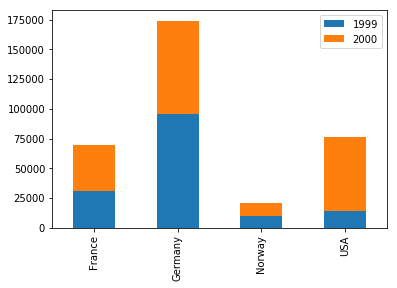

In [275]:
index= ['France','Germany','Norway','USA']
firstyear = df1999['Value'].values
secondyear = df2000['Value'].values


df = pd.DataFrame({'1999': firstyear,'2000': secondyear}, index=index)
ax = df.plot.bar(stacked=True)

In [243]:
dff = pd.read_csv('data/yearstate.csv')
dff.columns = ['Year', 'Africa', 'Asia','NAN','Europe','Union','Kosovo','Caribbean','South Asia','PSI','Total', 'Nan']
dff = dff.iloc[8:].reset_index()
dff = dff.drop(columns=['NAN','Nan','index'])

dff=dff.iloc[:45]

In [244]:
dff['Europe'] = dff['Europe'].str.replace(',', '')
dff['Asia'] = dff['Asia'].str.replace(',', '')
dff['Caribbean'] = dff['Caribbean'].str.replace(',', '')
dff['Africa'] = dff['Africa'].str.replace(',', '')


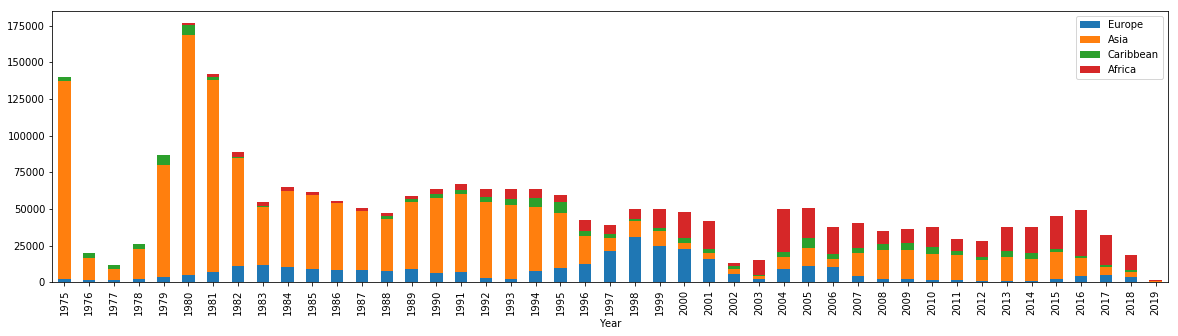

In [249]:
index1 = dff['Year']
europe = pd.to_numeric(dff['Europe'].values)
asia = pd.to_numeric(dff['Asia'].values)
caribbean = pd.to_numeric(dff['Caribbean'].values)
africa = pd.to_numeric(dff['Africa'].values)

data = pd.DataFrame({'Europe': europe,'Asia': asia, 'Caribbean': caribbean, 'Africa':africa}, index=index1)
ax1 = data.plot.bar(stacked=True,figsize=(20,5))

Cleaning Data:
This data file includes the refugee population in each country by year

In [227]:
df = pd.read_csv('data/world_data.csv')
df = df.drop('Indicator Code',axis=1)
df = df.drop('Indicator Name',axis=1)
df= df.drop(df.iloc[:,2:32],axis=1)
df = df.fillna(0)

In [228]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(num=None, figsize=(13, 7), dpi=80, facecolor='w', edgecolor='k')
germ = df.loc[df['Country Code'] == 'DEU']
germ_x=np.array(germ.columns.values)[2:-1]
germ_y=np.array(germ.loc[:,'1990':])[0][:-1]


<Figure size 1040x560 with 0 Axes>

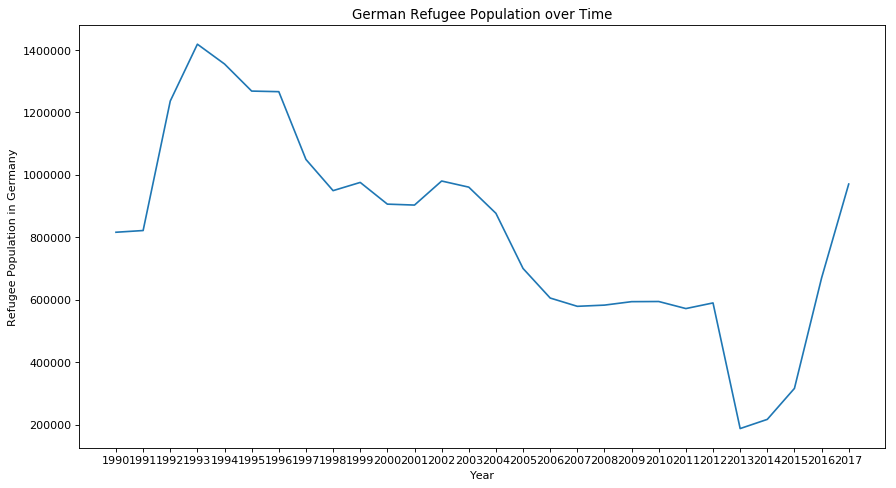

In [229]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(13, 7), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Year')
plt.ylabel('Refugee Population in Germany')
plt.title('German Refugee Population over Time')
plt.plot(germ_x,germ_y)

In [230]:
france = df.loc[df['Country Code'] == 'FRA']
franc_x=np.array(france.columns.values)[2:-1]
franc_y=np.array(france.loc[:,'1990':])[0][:-1]


**French Asylum Seekers over Time**<br>
Data from Worldbank: https://data.worldbank.org/indicator/SM.POP.REFG

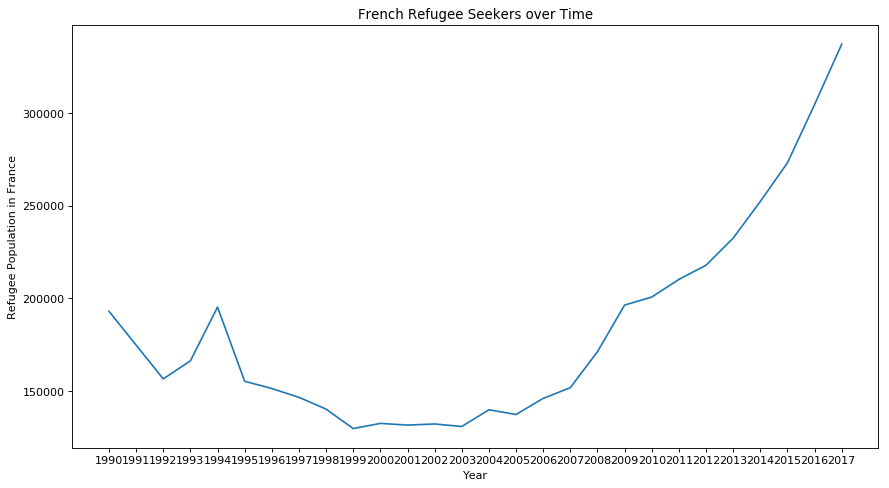

In [232]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(13, 7), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Year')
plt.ylabel('Refugee Population in France')
plt.title('French Refugee Seekers over Time')
plt.plot(franc_x,franc_y)

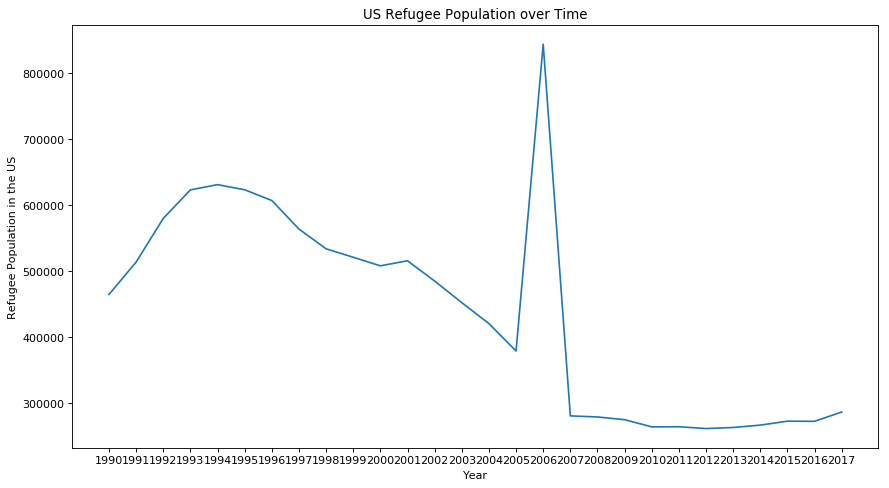

In [233]:
usa = df.loc[df['Country Code'] == 'USA']
usa_x=np.array(usa.columns.values)[2:-1]
usa_y=np.array(usa.loc[:,'1990':])[0][:-1]
from matplotlib.pyplot import figure
figure(num=None, figsize=(13, 7), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Year')
plt.ylabel('Refugee Population in the US')
plt.title('US Refugee Population over Time')
plt.plot(usa_x,usa_y)

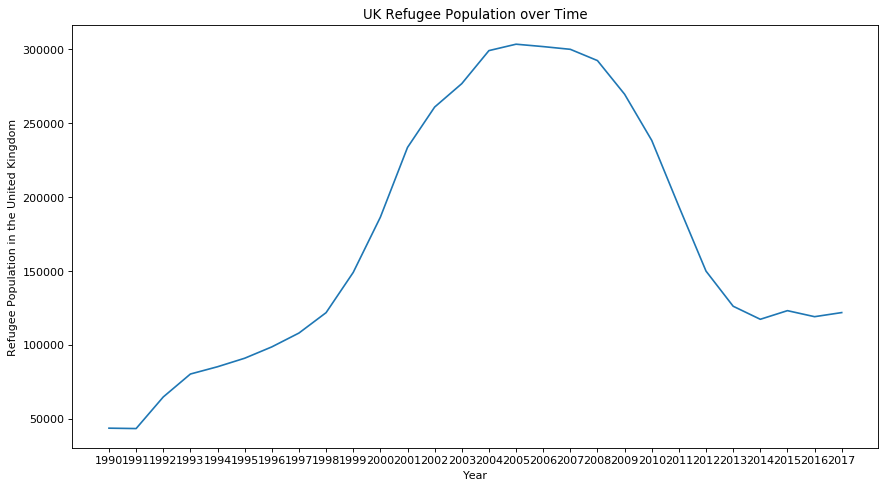

In [236]:
uk = df.loc[df['Country Code'] == 'GBR']
uk_x=np.array(uk.columns.values)[2:-1]
uk_y=np.array(uk.loc[:,'1990':])[0][:-1]
from matplotlib.pyplot import figure
figure(num=None, figsize=(13, 7), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Year')
plt.ylabel('Refugee Population in the United Kingdom')
plt.title('UK Refugee Population over Time')
plt.plot(uk_x,uk_y)

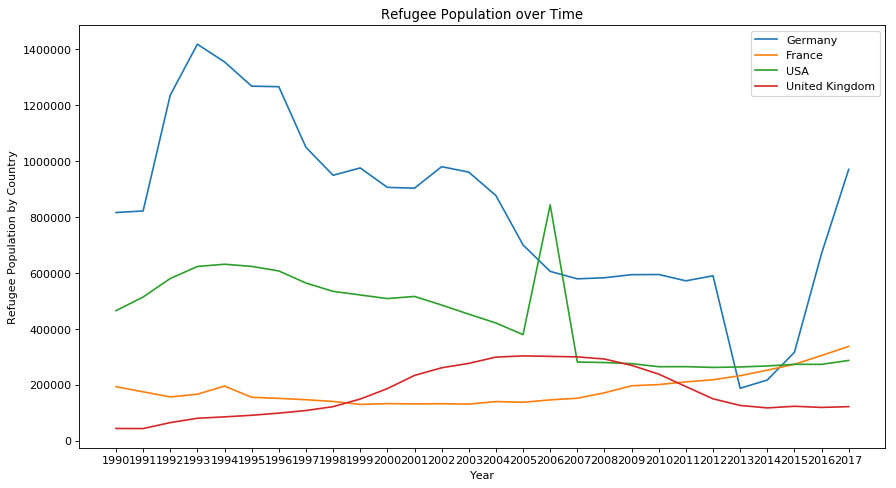

In [237]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(13, 7), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Year')
plt.ylabel('Refugee Population by Country')
plt.title('Refugee Population over Time')
germany = plt.plot(germ_x, germ_y)
france = plt.plot(franc_x, franc_y)
usa = plt.plot(usa_x, usa_y)
uk = plt.plot(uk_x, uk_y)
plt.legend(('Germany','France','USA','United Kingdom'))
plt.show()